In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#202331161_Agustne L B. Nikijuluw
img = cv2.imread('C:/Users/62852/OneDrive/Gambar/202331161_Agustne.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

In [4]:
#202331161_Agustne L B. Nikijuluw
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])
    
lower_green = np.array([40, 100, 70])
upper_green = np.array([80, 255, 255])
    
lower_blue = np.array([90, 100, 70])
upper_blue = np.array([130, 255, 255])

In [5]:
#202331161_Agustne L B. Nikijuluw
mask_red1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
mask_green = cv2.inRange(img_hsv, lower_green, upper_green)
mask_blue = cv2.inRange(img_hsv, lower_blue, upper_blue)

In [6]:
#202331161_Agustne L B. Nikijuluw
mask_red_blue = cv2.bitwise_or(mask_red, mask_blue)
mask_all = cv2.bitwise_or(mask_red_blue, mask_green)

In [7]:
#202331161_Agustne L B. Nikijuluw
result_none = np.zeros_like(img)
result_blue = np.zeros_like(img)
result_red_blue = np.zeros_like(img)
result_all = np.zeros_like(img)

In [8]:
#202331161_Agustne L B. Nikijuluw
result_blue[mask_blue > 0] = [255, 255, 255]
result_red_blue[mask_red_blue > 0] = [255, 255, 255]
result_all[mask_all > 0] = [255, 255, 255]

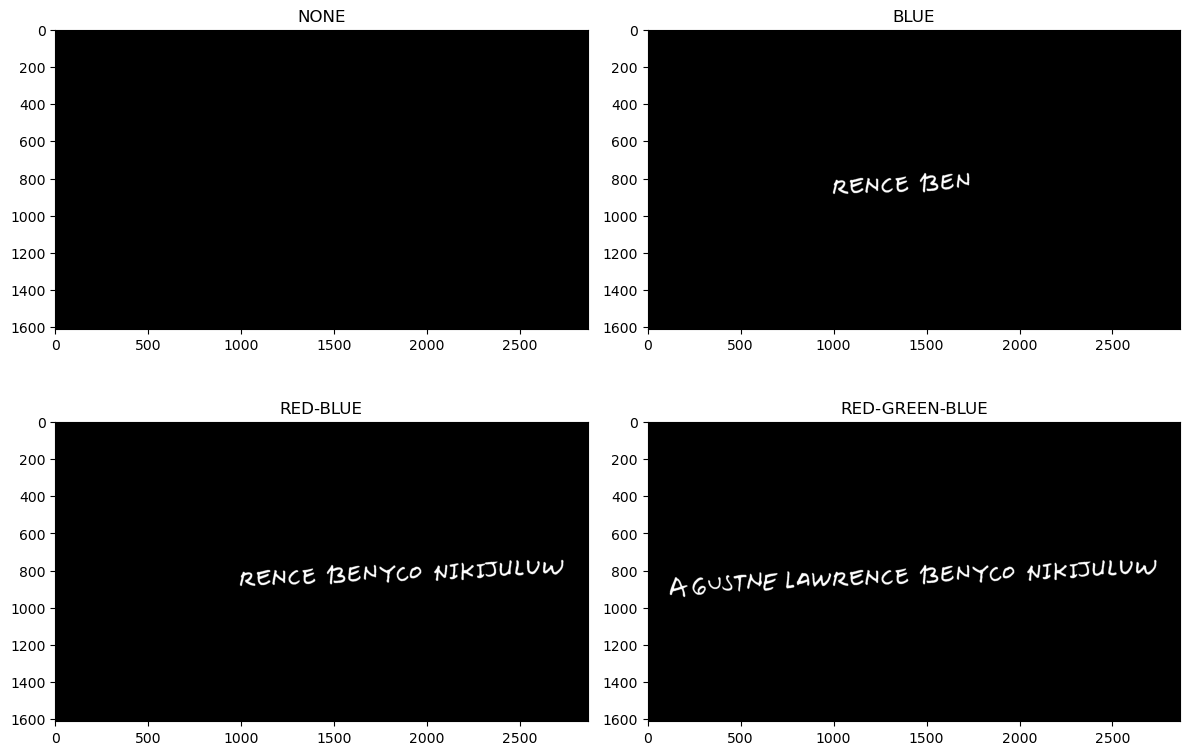

In [9]:
#202331161_Agustne L B. Nikijuluw
plt.figure(figsize=(12, 8))
    
plt.subplot(2, 2, 1)
plt.imshow(result_none)
plt.title("NONE")
plt.axis('on')
    
plt.subplot(2, 2, 2)
plt.imshow(result_blue)
plt.title("BLUE")
plt.axis('on')
    
plt.subplot(2, 2, 3)
plt.imshow(result_red_blue)
plt.title("RED-BLUE")
plt.axis('on')
    
plt.subplot(2, 2, 4)
plt.imshow(result_all)
plt.title("RED-GREEN-BLUE")
plt.axis('on')
    
plt.tight_layout()
plt.savefig("color_categories.png")

In [10]:
#202331161_Agustne L B. Nikijuluw
def detect_and_threshold_colors(image_path):
    thresholds = [
        ("Red H Min1", lower_red1[0]),
        ("Red H Max1", upper_red1[0]),
        ("Red S Min1", lower_red1[1]),
        ("Red S Max1", upper_red1[1]),
        ("Red V Min1", lower_red1[2]),
        ("Red V Max1", upper_red1[2]),
        ("Red H Min2", lower_red2[0]),
        ("Red H Max2", upper_red2[0]),
        ("Red S Min2", lower_red2[1]),
        ("Red S Max2", upper_red2[1]),
        ("Red V Min2", lower_red2[2]),
        ("Red V Max2", upper_red2[2]),
        ("Green H Min", lower_green[0]),
        ("Green H Max", upper_green[0]),
        ("Green S Min", lower_green[1]),
        ("Green S Max", upper_green[1]),
        ("Green V Min", lower_green[2]),
        ("Green V Max", upper_green[2]),
        ("Blue H Min", lower_blue[0]),
        ("Blue H Max", upper_blue[0]),
        ("Blue S Min", lower_blue[1]),
        ("Blue S Max", upper_blue[1]),
        ("Blue V Min", lower_blue[2]),
        ("Blue V Max", upper_blue[2])
    ]
    sorted_thresholds = sorted(thresholds, key=lambda x: x[1])
    return sorted_thresholds

sorted_thresholds = detect_and_threshold_colors("202331161_Agustne.jpg")

print("Nilai ambang batas diurutkan dari terkecil hingga terbesar:")
for name, value in sorted_thresholds:
    print(f"{name}: {value}")

Nilai ambang batas diurutkan dari terkecil hingga terbesar:
Red H Min1: 0
Red H Max1: 10
Green H Min: 40
Red V Min1: 70
Red V Min2: 70
Green V Min: 70
Blue V Min: 70
Green H Max: 80
Blue H Min: 90
Green S Min: 100
Blue S Min: 100
Red S Min1: 120
Red S Min2: 120
Blue H Max: 130
Red H Min2: 170
Red H Max2: 180
Red S Max1: 255
Red V Max1: 255
Red S Max2: 255
Red V Max2: 255
Green S Max: 255
Green V Max: 255
Blue S Max: 255
Blue V Max: 255
